In [1]:
from tournament.agents.constant import AllC, AllD
from tournament.agents.pavlov import Pavlov
from tournament.agents.q_learning.dqn import DeepQLearner
from tournament.agents.tft import TFTT, GenerousTFT, TitForTat
from tournament.environments.single import SingleRuleBasedAgentEnvironment

import torch
import matplotlib.pyplot as plt

plt.rcParams["figure.figsize"] = (20, 12)

In [2]:
env = SingleRuleBasedAgentEnvironment(TitForTat)

In [3]:
class QLearningTest(DeepQLearner):
    def __init__(self):
        super().__init__()
        self.lookback = 1
        self.epsilon = 0.25


agent = QLearningTest()

In [4]:
env.train(
    trainee=agent,
    continuation_probability=1,
    limit=200,
    noise=0,
    repetitions=200,
    epochs=1,
)

POSTMATCH 1: tensor([[18.6590, 17.8167]], grad_fn=<ReluBackward0>) 31.865465641878544
POSTMATCH 2: tensor([[21.8605, 22.1532]], grad_fn=<ReluBackward0>) 16.792315270602558
POSTMATCH 3: tensor([[47.8313, 48.4787]], grad_fn=<ReluBackward0>) 11.599666030998245
POSTMATCH 4: tensor([[28.9688, 30.7208]], grad_fn=<ReluBackward0>) 9.007150565354786
POSTMATCH 5: tensor([[60.0389, 55.0582]], grad_fn=<ReluBackward0>) 7.358641873490734
POSTMATCH 6: tensor([[48.0435, 46.2886]], grad_fn=<ReluBackward0>) 6.720162053672675
POSTMATCH 7: tensor([[37.1254, 45.1227]], grad_fn=<ReluBackward0>) 5.8790359921721835
POSTMATCH 8: tensor([[30.4708, 26.6283]], grad_fn=<ReluBackward0>) 5.337205599344727
POSTMATCH 9: tensor([[29.5578, 25.4087]], grad_fn=<ReluBackward0>) 4.970038734030404
POSTMATCH 10: tensor([[19.5173, 21.7155]], grad_fn=<ReluBackward0>) 4.75455198806977
POSTMATCH 11: tensor([[39.2373, 32.9779]], grad_fn=<ReluBackward0>) 4.498676042871681
POSTMATCH 12: tensor([[19.9445, 30.8721]], grad_fn=<ReluBack

In [5]:
print(agent._q_network)
print(env.counts)

s = sum(env.counts.values())

print({a: env.counts[a] / s for a in env.counts})

QNetwork(
  (flatten): Flatten(start_dim=1, end_dim=-1)
  (layer1): Linear(in_features=2, out_features=32, bias=True)
  (layer2): Linear(in_features=32, out_features=64, bias=True)
  (layer3): Linear(in_features=64, out_features=32, bias=True)
  (layer4): Linear(in_features=32, out_features=2, bias=True)
)
{<Action.COOPERATE: 0>: 27871, <Action.DEFECT: 1>: 12129}
{<Action.COOPERATE: 0>: 0.696775, <Action.DEFECT: 1>: 0.303225}


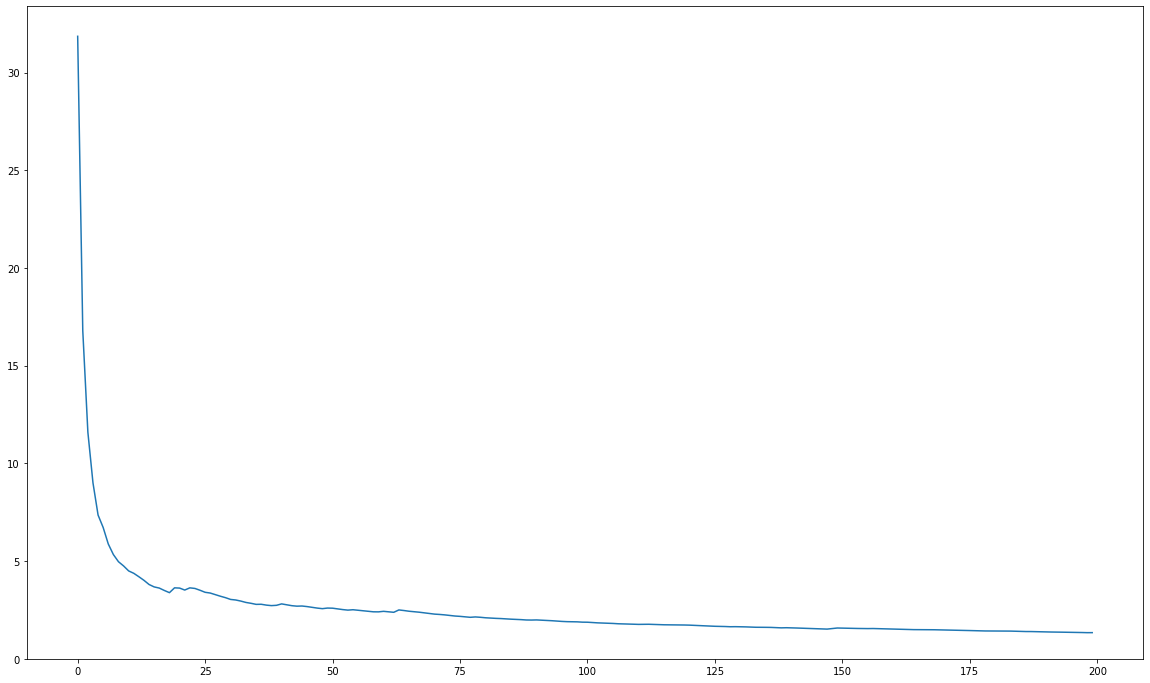

In [6]:
plt.plot(agent._losses)
plt.ylim(bottom=0)
plt.show()

In [ ]:
# torch.save(agent._q_network.state_dict(), "model.pt")